# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [6]:
# read the data
df = pd.read_csv("C:/Users/Yenu5/OneDrive/Desktop/Data Science/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
df.shape

(1898, 9)

#### Observations: the data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: there are 4 intiger , 2 object, 1 float and 4 object data types . All column do not have null values 


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [15]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: as seen in the info section above no null value is observed 


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [18]:
# Minimum, average (mean), and maximum of 'food_preparation_time'
min_time = df['food_preparation_time'].min()
avg_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()
# Print the results

print("Minimum food preparation time is: " + str(min_time) + " minutes")
print("Average food preparation time is: " + str(avg_time) + " minutes")
print("Maximum food preparation time is: " + str(max_time) + " minutes")

Minimum food preparation time is: 20 minutes
Average food preparation time is: 27.371970495258168 minutes
Maximum food preparation time is: 35 minutes


#### Observations:
Minimum food preparation time is: 20 minutes
Average food preparation time is: 27.371970495258168 minutes
Maximum food preparation time is: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [116]:
print(df['rating'].unique())
# Normalize the rating column
df['rating'] = df['rating'].astype(str).str.strip().str.lower()

# Count the number of orders with 'not given' rating
not_given_count = df[df['rating'] == 'nan'].shape[0]

print(f"Number of orders that were not rated: {not_given_count}")

['nan' '5.0' '3.0' '4.0']
Number of orders that were not rated: 736


#### Observations: even thou the head of the data shows Not given in the rating , using the print(df['rating'].unique()),  it was find out nan . Then the Number of orders that were not rated: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

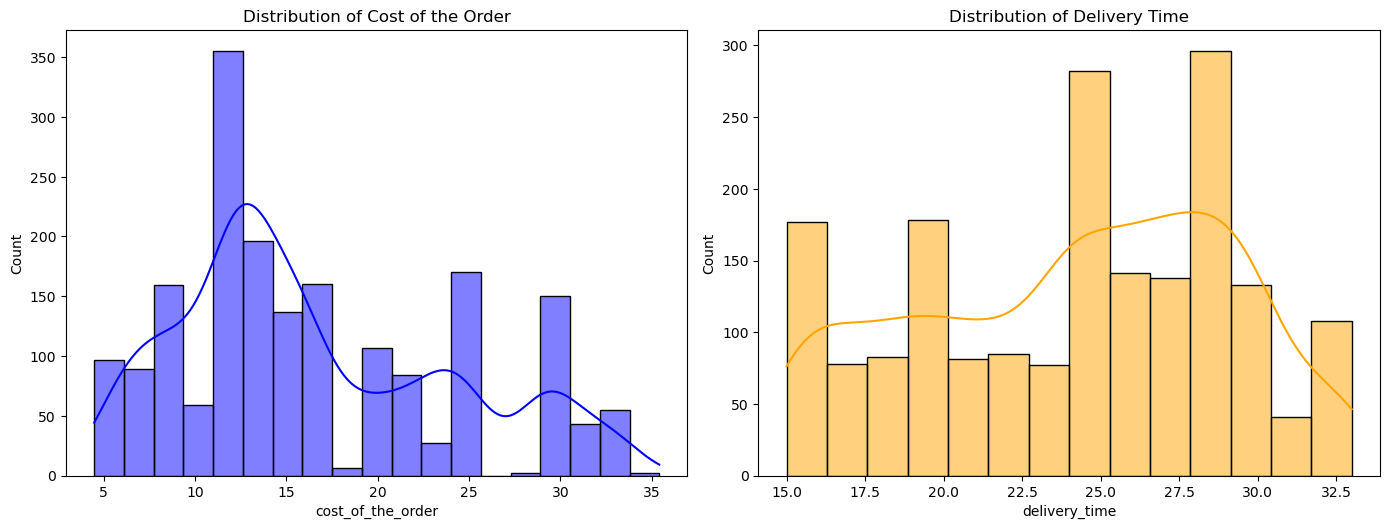

In [122]:
# Plot histograms for continuous variables
plt.figure(figsize=(14, 10))

# Histogram for cost_of_the_order
plt.subplot(2, 2, 1)
sns.histplot(df['cost_of_the_order'], kde=True, color='blue')
plt.title('Distribution of Cost of the Order')

# Histogram for delivery_time
plt.subplot(2, 2,2)
sns.histplot(df['delivery_time'], kde=True, color='orange')
plt.title('Distribution of Delivery Time')

# Adjust layout
plt.tight_layout()
plt.show()


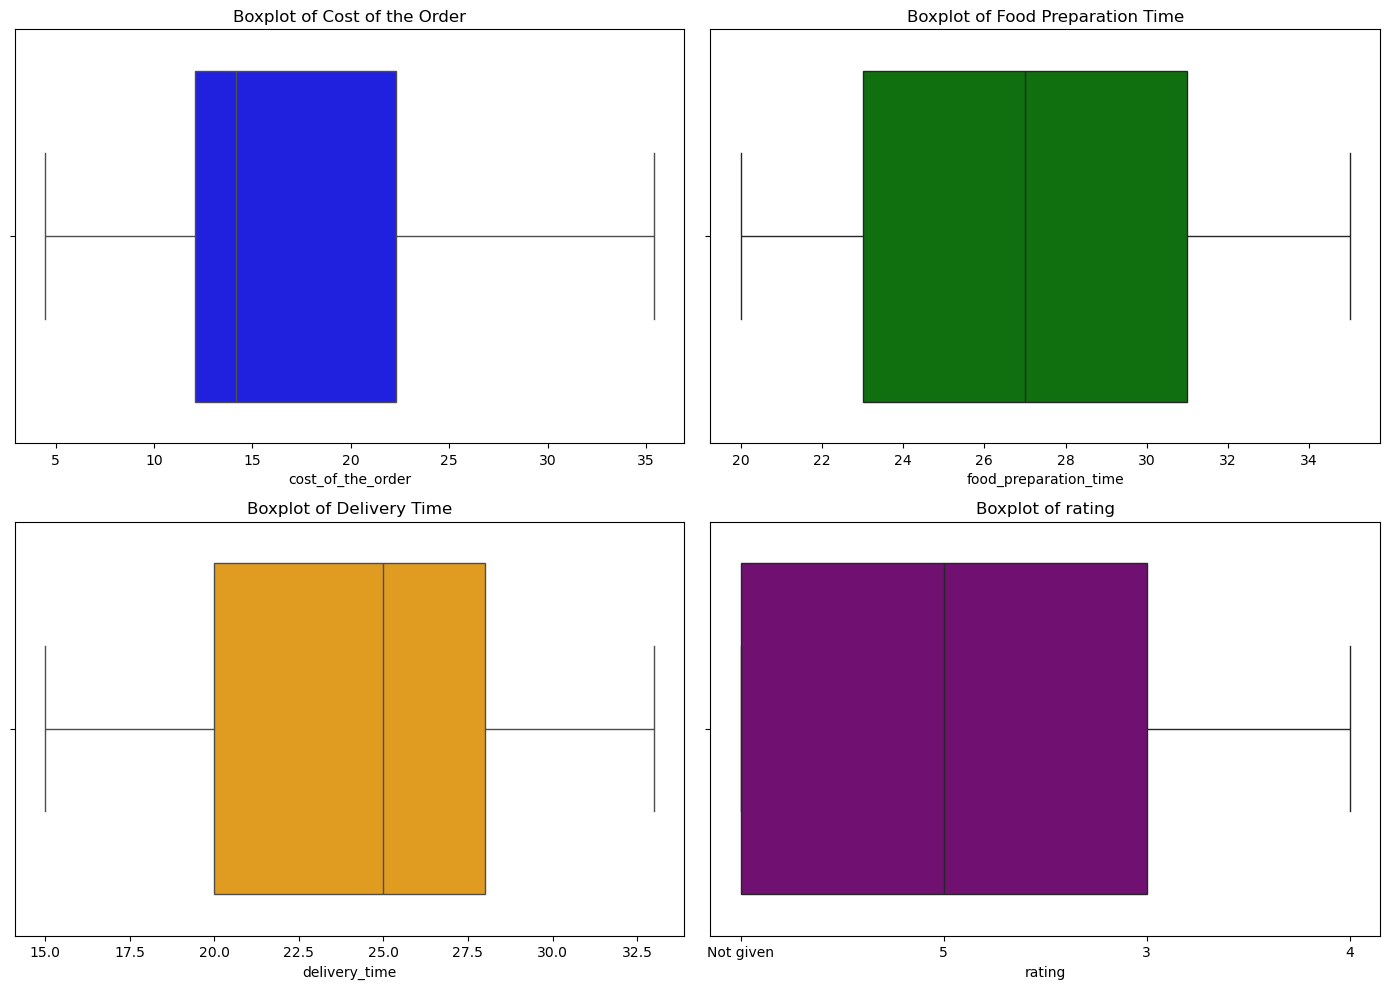

In [27]:
# Plot boxplots for continuous variables
plt.figure(figsize=(14, 10))

# Boxplot for cost_of_the_order
plt.subplot(2, 2, 1)
sns.boxplot(x=df['cost_of_the_order'], color='blue')
plt.title('Boxplot of Cost of the Order')

# Boxplot for food_preparation_time
plt.subplot(2, 2, 2)
sns.boxplot(x=df['food_preparation_time'], color='green')
plt.title('Boxplot of Food Preparation Time')

# Boxplot for delivery_time
plt.subplot(2, 2, 3)
sns.boxplot(x=df['delivery_time'], color='orange')
plt.title('Boxplot of Delivery Time')
# Boxplot for rating
plt.subplot(2, 2, 4)
sns.boxplot(x=df['rating'], color='purple')
plt.title('Boxplot of rating')

# Adjust layout
plt.tight_layout()
plt.show()

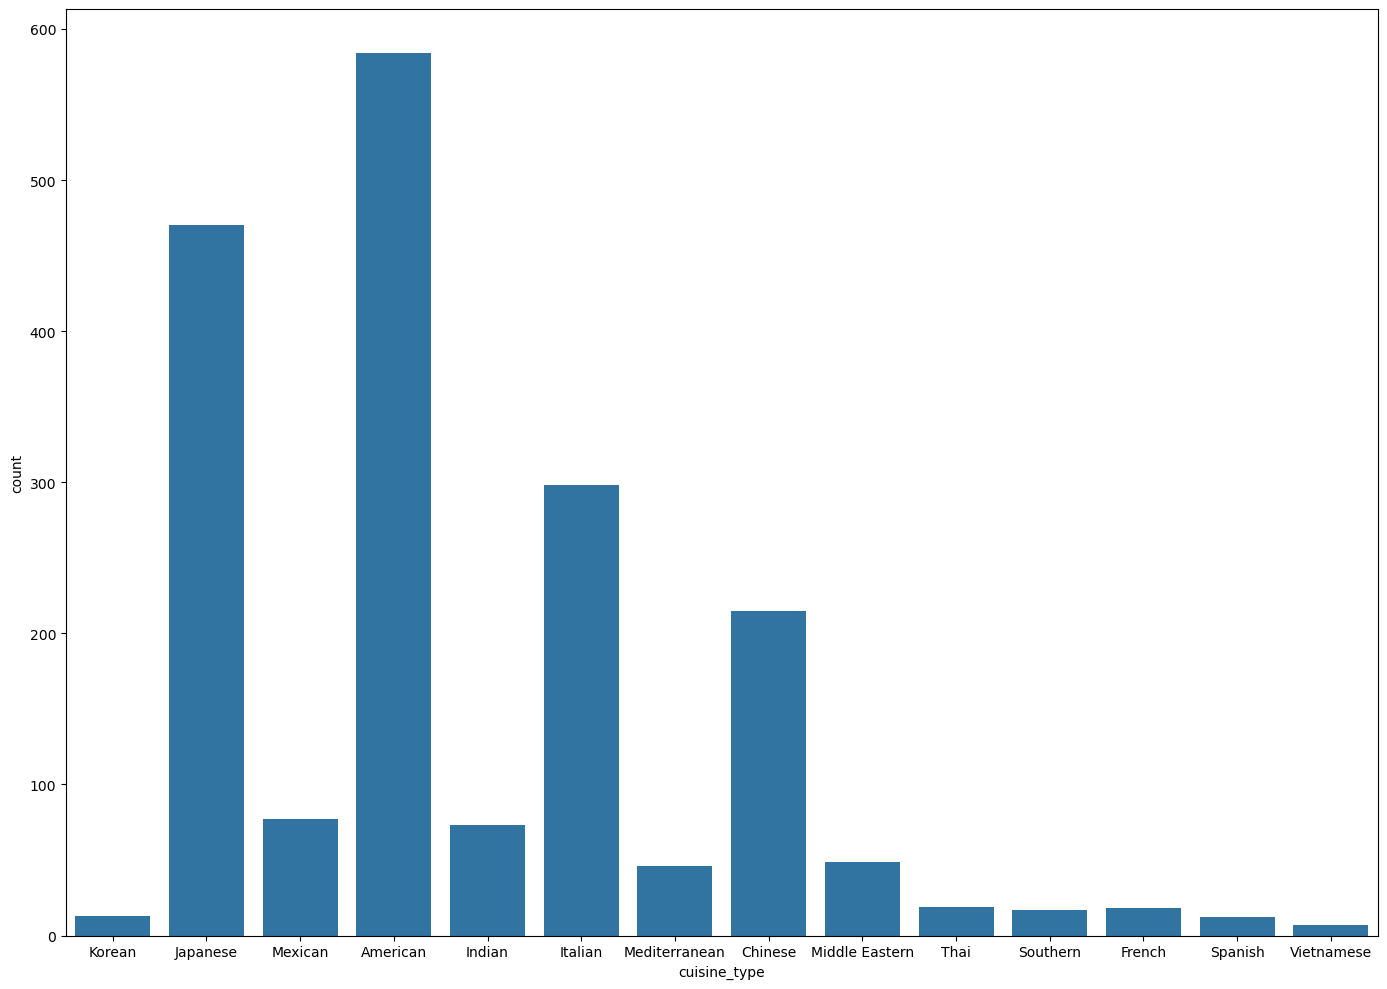

In [28]:
# Plot countplots for categorical variables
plt.figure(figsize=(14, 10))

# Countplot for cuisine_type

sns.countplot(data=df, x='cuisine_type');

# Adjust layout
plt.tight_layout()
plt.show()

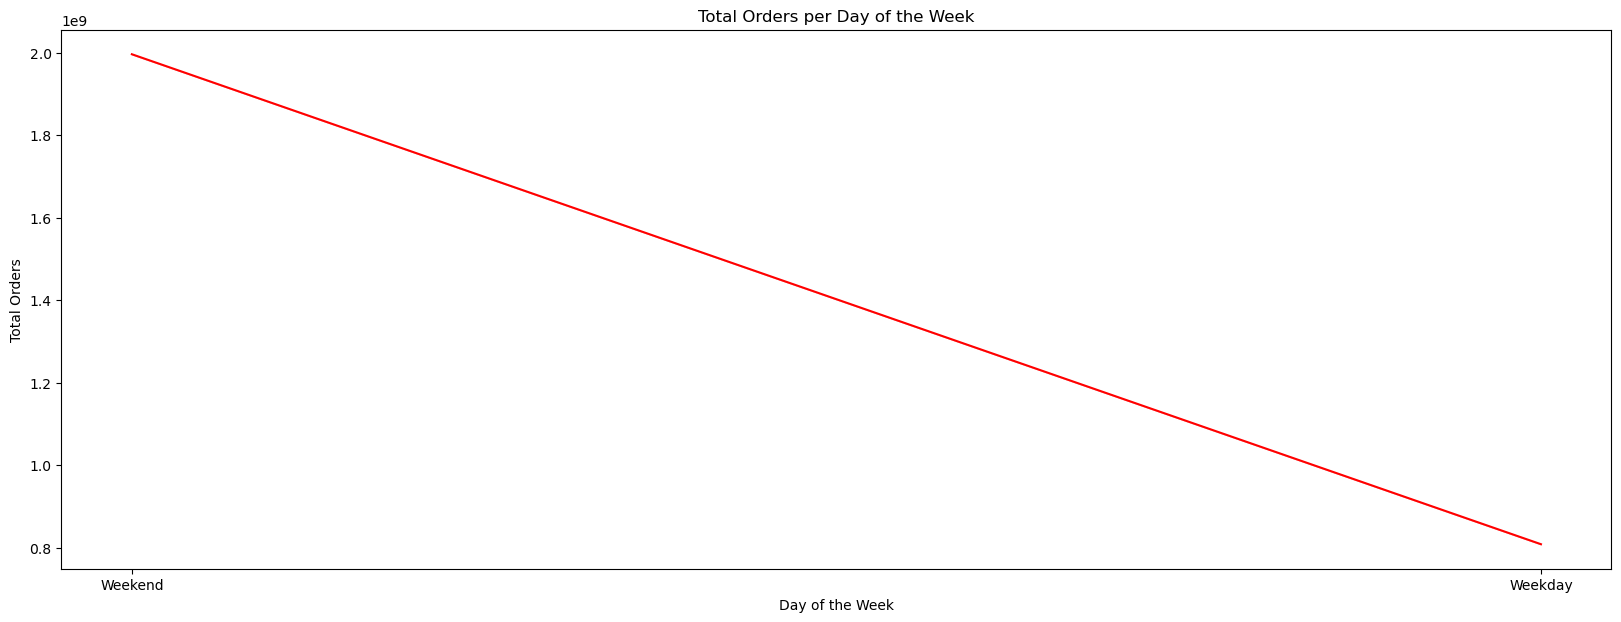

In [29]:

# Ensure the days of the week are in the correct order
cats = df.day_of_the_week.unique().tolist()
df.day_of_the_week = pd.Categorical(df.day_of_the_week, ordered=True, categories=cats)

# Create a line plot for total orders by day of the week
plt.figure(figsize=(20, 7))
sns.lineplot(x="day_of_the_week", y="order_id", data=df, color="red", estimator='sum')

# Labels and title
plt.ylabel('Total Orders')
plt.xlabel('Day of the Week')
plt.title('Total Orders per Day of the Week')
plt.show()

C:\Users\Yenu5\AppData\Local\Temp\ipykernel_28360\2177874911.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(index='day_of_the_week', columns='food_preparation_time', values='order_id', aggfunc='count')


<function matplotlib.pyplot.show(close=None, block=None)>

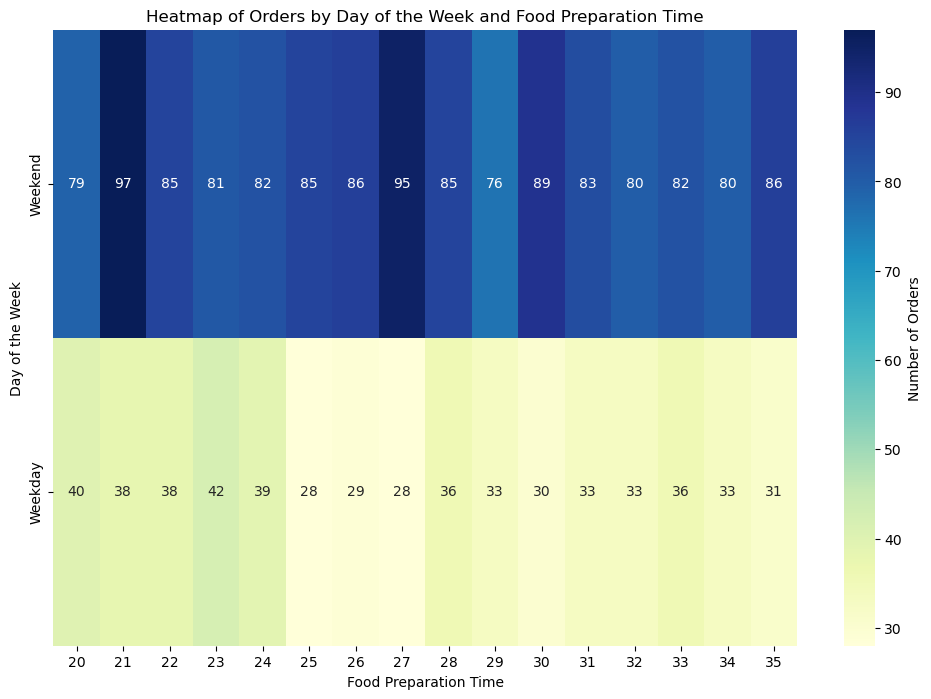

In [30]:
# Create a pivot table with 'day_of_the_week' as rows and 'food_preparation_time' as columns
# We are summing the 'order_id' for each combination of day and preparation time
pivot_data = df.pivot_table(index='day_of_the_week', columns='food_preparation_time', values='order_id', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Orders'})
plt.title('Heatmap of Orders by Day of the Week and Food Preparation Time')
plt.ylabel('Day of the Week')
plt.xlabel('Food Preparation Time')
plt.show

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

C:\Users\Yenu5\AppData\Local\Temp\ipykernel_28360\675549181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values, palette='Set2')


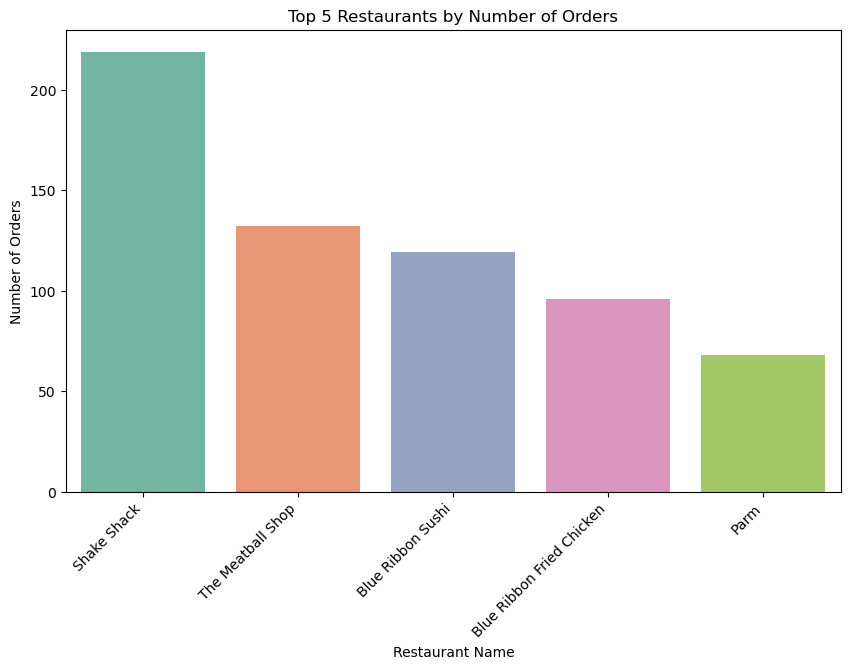

In [32]:
# Group by 'restaurant_name' and count the number of orders
restaurant_order_counts = df.groupby('restaurant_name')['order_id'].count()

# Sort the restaurants by the number of orders in descending order and select the top 5
top_5_restaurants = restaurant_order_counts.sort_values(ascending=False).head(5)

# Create a bar plot to visualize the top 5 restaurants
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_restaurants.index, y=top_5_restaurants.values, palette='Set2')

# Set labels and title
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Observations: The five top restorats are  Shake Shake, The meatball Shop , blue ribbon , blue ribbon freid chken and Parm . Among thse Shake Shake has recived the hgher number of orders 



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

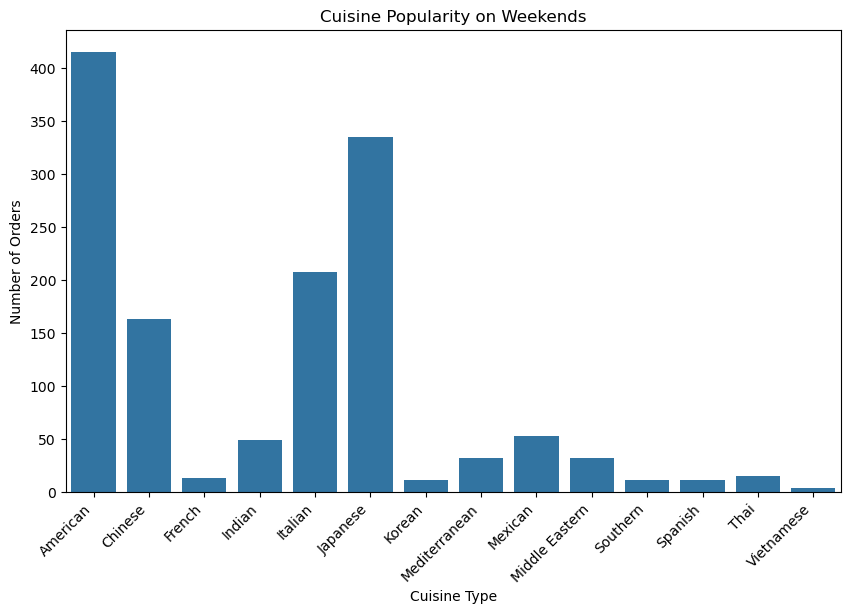

In [35]:
# Filter the data for weekends
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Group by 'cuisine_type' and count the number of orders
cuisine_order_counts = weekend_data.groupby('cuisine_type')['order_id'].count()

# Create a bar plot to visualize the cuisine popularity on weekends
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_order_counts.index, y=cuisine_order_counts.values)

# Set labels and title
plt.title('Cuisine Popularity on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Observations:American is teh most popular restaurant during weekend


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [38]:
# Calculate the total number of orders
total_orders = len(df)

# Filter orders where cost is greater than 20
orders_above_20 = len(df[df['cost_of_the_order'] > 20])

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Print the result
print(f"Percentage of orders that cost more than 20 dollars: {percentage_above_20:.2f}%")

Percentage of orders that cost more than 20 dollars: 29.24%


#### Observations:Percentage of orders that cost more than 20 dollars: 29.24% 


### **Question 10**: What is the mean order delivery time? [1 mark]

In [41]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the result
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:The mean order delivery time is: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [44]:
# Group by 'customer_id' and count the number of orders placed by each customer
customer_order_counts = df.groupby('customer_id')['order_id'].count()

# Sort the customers by the number of orders in descending order
top_3_customers = customer_order_counts.sort_values(ascending=False).head(3)

# Convert to DataFrame and reset the index for better formatting
top_3_customers_df = top_3_customers.reset_index()

# Rename columns to make it more readable
top_3_customers_df.columns = ['customer_id', 'number_of_orders']

# Display the result
print("Top 3 Most Frequent Customers and their Number of Orders:")
print(top_3_customers_df)

Top 3 Most Frequent Customers and their Number of Orders:
   customer_id  number_of_orders
0        52832                13
1        47440                10
2        83287                 9


#### Observations:  with ID  52832 ordered 13 times , costomer with ID 147440 orderd 10 times, costomer with ID   83287   orderd 9 times 


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


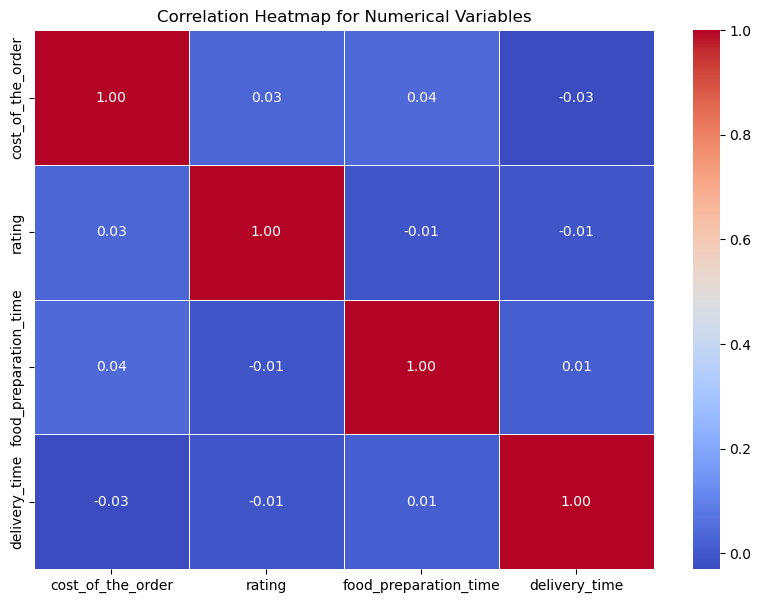

In [48]:
# Replace 'Not given' with NaN
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# 1. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 7))
corr_matrix = df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

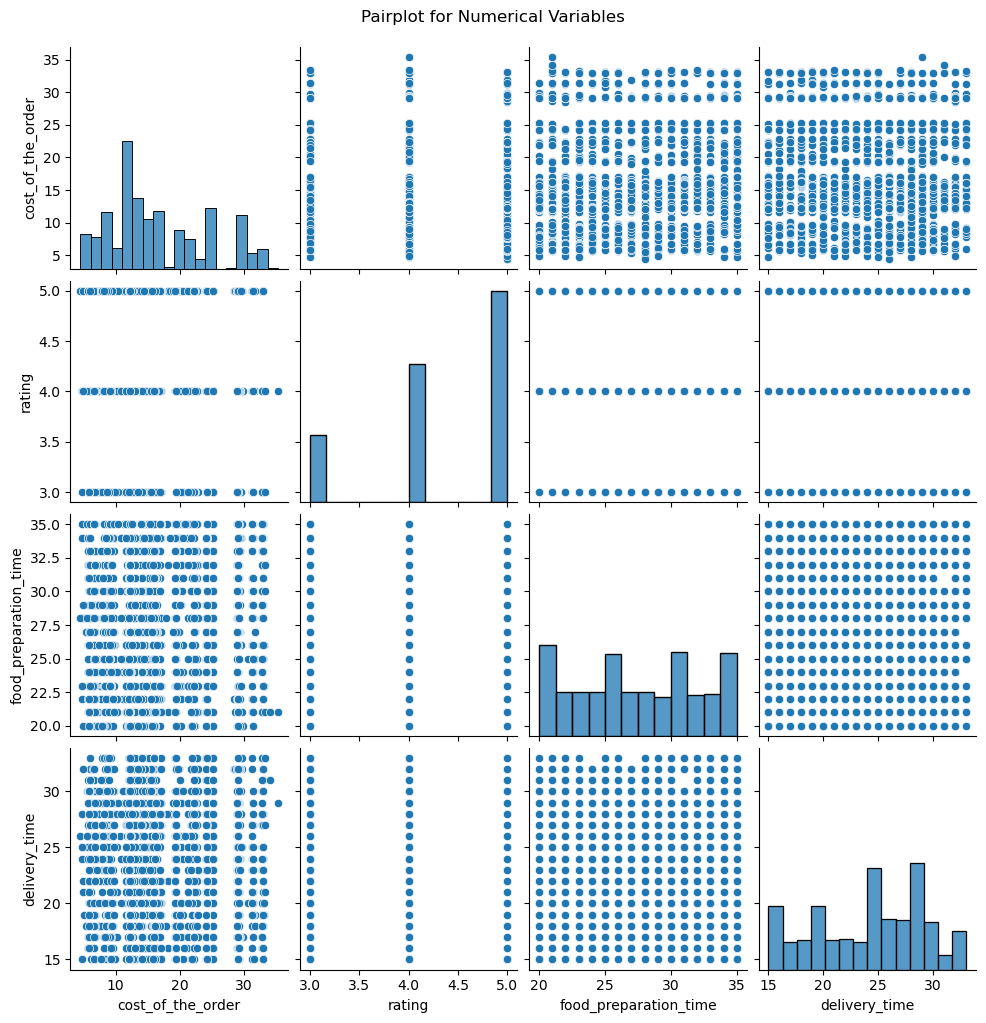

In [49]:
sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()

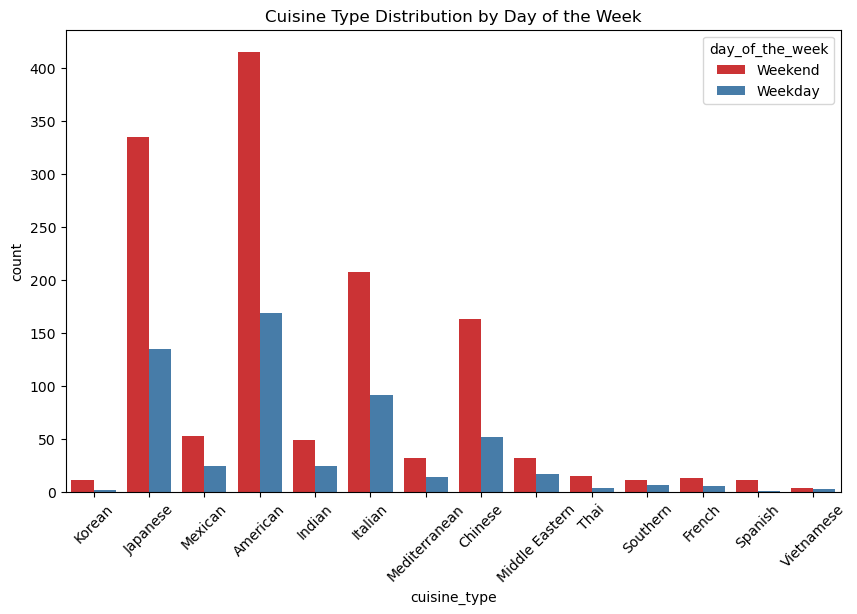

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', hue='day_of_the_week', data=df, palette='Set1')
plt.title('Cuisine Type Distribution by Day of the Week')
plt.xticks(rotation=45)
plt.show()

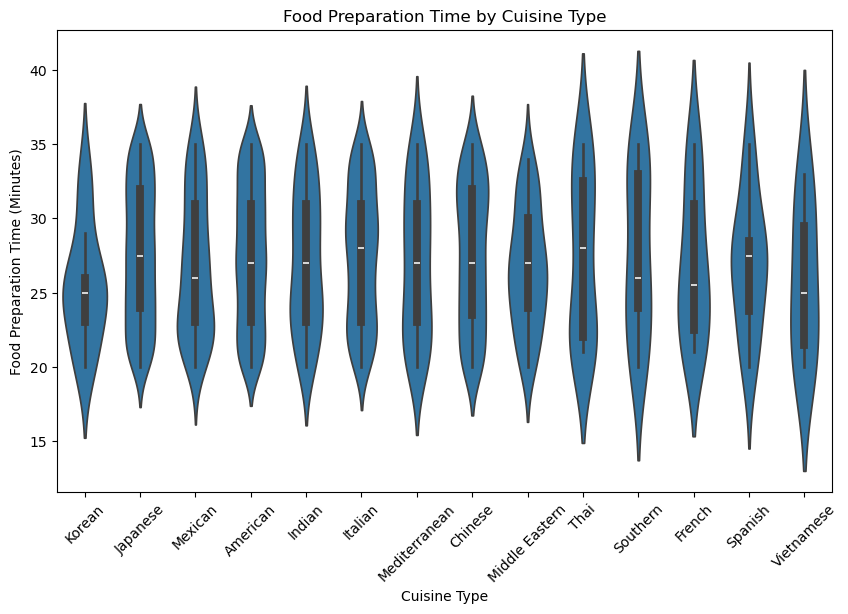

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cuisine_type', y='food_preparation_time', data=df, )
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (Minutes)')
plt.xticks(rotation=45)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [54]:
# Group by 'restaurant_name' and calculate the count of ratings and average rating
restaurant_ratings = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
)

# Filter the restaurants based on the criteria: count of ratings > 50 and average rating > 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & 
                                           (restaurant_ratings['avg_rating'] > 4)]

# Display the eligible restaurants
print("Restaurants fulfilling the criteria for the promotional offer:")
print(eligible_restaurants)


Restaurants fulfilling the criteria for the promotional offer:
                           rating_count  avg_rating
restaurant_name                                    
Blue Ribbon Fried Chicken            64    4.328125
Blue Ribbon Sushi                    73    4.219178
Shake Shack                         133    4.278195
The Meatball Shop                    84    4.511905


#### Observations: teh eligible restaurants are Blue Ribbon Fried Chicken, Blue Ribbon Sushi ,Shake Shack  and The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [57]:
# Create a new column for the charges based on the cost_of_the_order
def calculate_charge(order_cost):
    if order_cost > 20:
        return order_cost * 0.25  # 25% charge for orders above 20
    elif order_cost > 5:
        return order_cost * 0.15  # 15% charge for orders between 5 and 20
    else:
        return 0  # No charge for orders 5 or less

# Apply the function to the 'cost_of_the_order' column
df['charge'] = df['cost_of_the_order'].apply(calculate_charge)

# Calculate the total net revenue
net_revenue = df['charge'].sum()

# Display the result
print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")


The net revenue generated by the company across all orders is: $6166.30


#### Observations:The net revenue generated by the company across all orders is: $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [60]:
# Calculate the total time by adding food preparation time and delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60]

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60 = (len(orders_above_60) / total_orders) * 100

# Display the result
print(f"The percentage of orders that take more than 60 minutes to deliver is: {percentage_above_60:.2f}%")


The percentage of orders that take more than 60 minutes to deliver is: 10.54%


#### Observations:The percentage of orders that take more than 60 minutes to deliver is: 10.54%



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [63]:
# Group by 'day_of_the_week' and calculate the mean delivery time for weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the mean delivery time for weekdays and weekends
print(mean_delivery_time_by_day)


day_of_the_week
Weekend    22.470022
Weekday    28.340037
Name: delivery_time, dtype: float64


C:\Users\Yenu5\AppData\Local\Temp\ipykernel_28360\3561215731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()


#### Observations: The weekday delivery time( 28.340037) is higher than the weekend(22.470022) dalivery time 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions and Recomendation:
Weekday delivery times are longer, indicating potential areas for process improvement. A notable percentage of orders take over an hour to deliver, highlighting the need for better logistics and resource allocation. Revenue from commissions is healthy, but there's room for growth by encouraging higher-value orders.

High-performing restaurants like Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop consistently receive excellent feedback and high order volumes, making them ideal candidates for promotion. Also Investigate potential bottlenecks on weekdays

---